In [45]:
import pandas as pd
df = pd.read_csv ('C:/Users/PC/Downloads/Credit_card_dataset.csv')
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [51]:
new_df = df.drop(['CUST_ID'], axis = 1 )

In [53]:
new_df.isnull().sum()

BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [55]:
new_df.fillna({'CREDIT_LIMIT': 0}, inplace=True)
test = new_df.drop(['BALANCE_FREQUENCY','PAYMENTS','CASH_ADVANCE'] , axis = 1 )

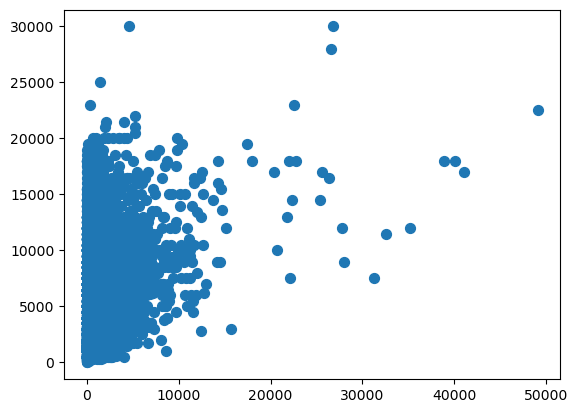

In [57]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
plt.scatter(test['PURCHASES'], test['CREDIT_LIMIT'], s=50)
plt.show()


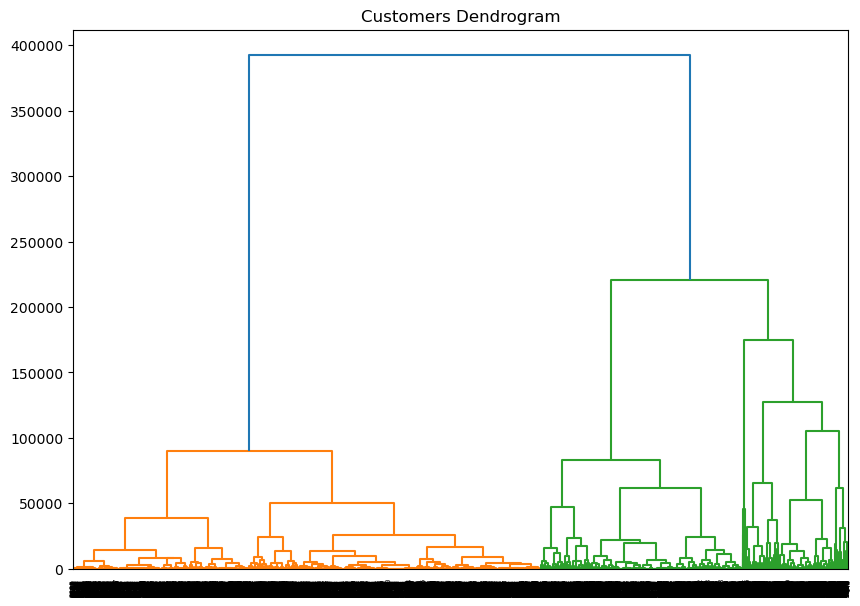

In [62]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = test
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [68]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Credit card Data')

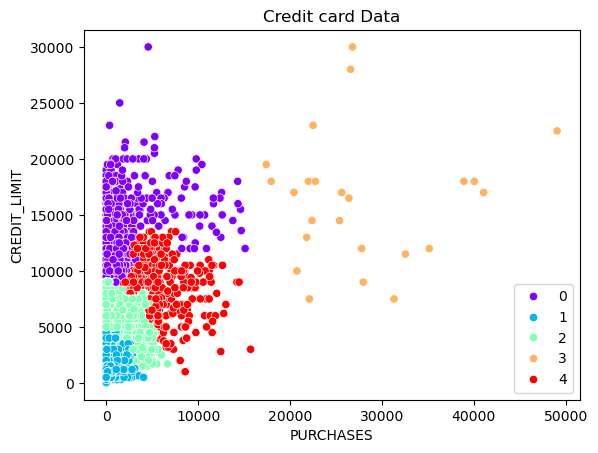

In [72]:
import seaborn as sns
data_labels = clustering_model.labels_
sns.scatterplot(x='PURCHASES', 
                y='CREDIT_LIMIT', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Credit card Data')

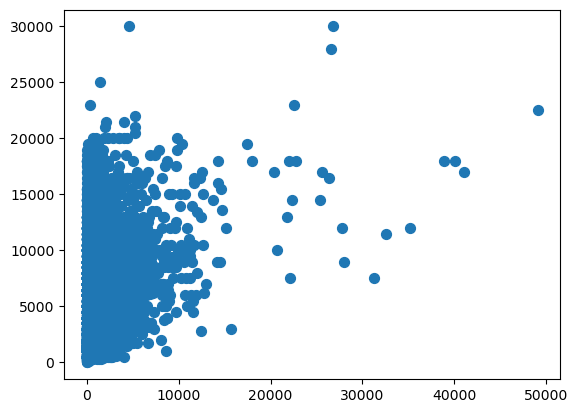

In [76]:
from sklearn.cluster import KMeans
plt.scatter(test['PURCHASES'], test['CREDIT_LIMIT'], s=50)


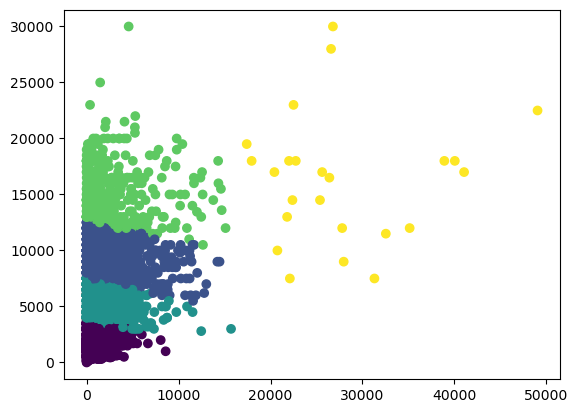

In [88]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(test)

plt.scatter(test['PURCHASES'],test['CREDIT_LIMIT'], c=kmeans.labels_)
plt.show()

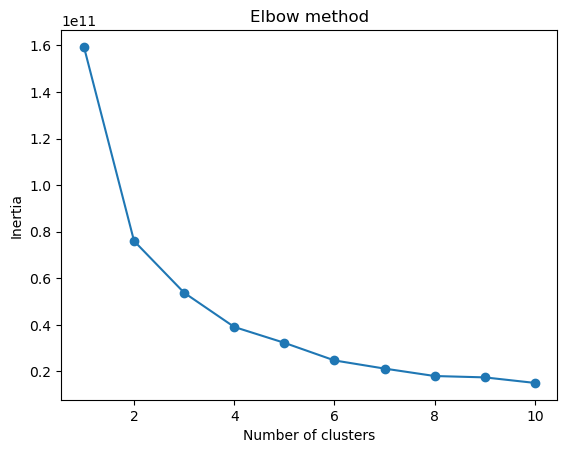

In [86]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(test)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

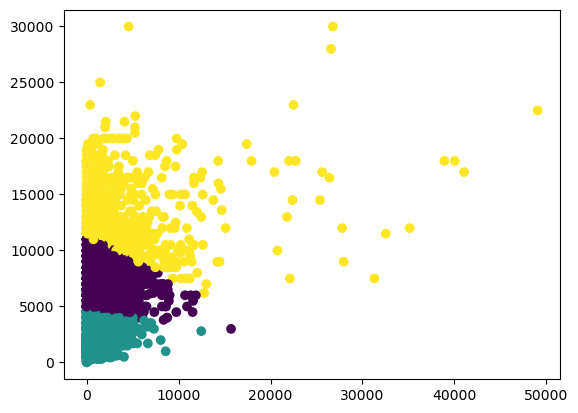

In [90]:
n_clusters = 3
kmeans = KMeans(n_clusters)
kmeans.fit(test)

plt.scatter(test['PURCHASES'],test['CREDIT_LIMIT'], c=kmeans.labels_)
plt.show()